<a href="https://colab.research.google.com/github/jet981217/COVID19_PREDICTION_VARIOUS_AI_COMPARISON/blob/master/COVID_19_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#딥러닝 시작하자#일주일단위#셋다 파이프 만드는중 ㅇ->완료 ㅋ배치사이즈,learning rate,에포크 조기종료 추가해야하
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
 
#ANN with no hidden layers
def Model_Build_Zero_Hidden(first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2), activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))  
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#ANN with one hidden layers
def Model_Build_One_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with two hidden layers 
def Model_Build_Two_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with three hidden layers 
def Model_Build_Three_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, fourth_Drop_val, fourth_neuron, fourth_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2, fourth_l1, fourth_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #third hidden state
  Model.add(layers.Dense(fourth_neuron, kernel_regularizer=regularizers.l1_l2(l1=fourth_l1, l2=fourth_l2),activation = fourth_activator))
  Model.add(keras.layers.Dropout(fourth_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model 
 
#Accessing to Datas
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
#Data spilted to Train and Test. This is only for Polynomial, ANN and DNNs
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 42)
 
mean  = train_input.mean(axis=0)
 
 
#하이퍼파라미터 튜닝이 끝나고 마지막 training을 위해 정규화
train_input_forlast = train_input.astype('float64')
last_mean = train_input_forlast.mean(axis=0)
train_input_forlast -=last_mean
#train_input_forlast -=mean
std = train_input_forlast.std(axis=0)
train_input_forlast /= std
 
NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
#NUM_CHECK_INPUT =[1629,1486,1318,1365,1896,1674,1710]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT -= mean
NUM_CHECK_INPUT /= std
#NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,7))
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))
 
test_input = test_input.astype('float64')
test_input -= mean
test_input /= std
 
 
 
#ANN_with no hidden layer
regressor_Zero = KerasRegressor(build_fn = Model_Build_Zero_Hidden, verbose=0)
pipe_Zero = Pipeline([('scaler', MaxAbsScaler()), ('ANN', regressor_Zero)])
 
params = {'ANN__first_Drop_val': uniform(0,0.3),
          'ANN__first_neuron': randint(10,64),
          'ANN__first_activator': ['tanh','sigmoid'],
          'ANN__optimizer_val' : ['adam','rmsprop'],
          'ANN__first_l1' : uniform(0,0.003),
          'ANN__first_l2' : uniform(0,0.003),
          'ANN__epochs' : randint(250,400),
          }
 
grid_Zero = RandomizedSearchCV(pipe_Zero, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Zero.fit(train_input, train_target)
 
 
print('\nANN with Zero hidden state''sRandomSearchCV 최적 파라미터:', grid_Zero.best_params_)
 
Model_Zero = Model_Build_Zero_Hidden(grid_Zero.best_params_.get('ANN__first_Drop_val'), grid_Zero.best_params_.get('ANN__first_neuron'), grid_Zero.best_params_.get('ANN__first_activator'), grid_Zero.best_params_.get('ANN__optimizer_val'), grid_Zero.best_params_.get('ANN__first_l1'), grid_Zero.best_params_.get('ANN__first_l2'))
history_Zero = Model_Zero.fit(train_input_forlast, train_target, epochs= grid_Zero.best_params_.get('ANN__epochs'), verbose=0)
 
Model_Zero_mse_score, Model_Zero_mae_score, Model_Zero_rmse_score= Model_Zero.evaluate(test_input, test_target)
 
print('\nBest score for ANN with No hidden state is: ', math.sqrt(-1*grid_Zero.best_score_))
print('\nPrediction for ANN with No hidden state is: ', Model_Zero.predict([NUM_CHECK_INPUT]))
print('\nANN with No hidden state''s Mae score for Test is: ',Model_Zero_mae_score)
print('\nANN with No hidden state''s Rmse score for Test is: ',math.sqrt(Model_Zero_rmse_score))
 
plt.title("Zero hidden Layer MAE")
plt.plot(history_Zero.history['mae'])
plt.plot(np.sqrt(history_Zero.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
#ANN with 1 hidden layers
regressor_One = KerasRegressor(build_fn = Model_Build_One_Hidden, verbose=0)
pipe_One = Pipeline([('scaler', MaxAbsScaler()), ('ANN_1', regressor_One)])
 
params = {'ANN_1__first_Drop_val': uniform(0,0.3),
          'ANN_1__first_neuron': randint(10,64),
          'ANN_1__first_activator': ['tanh','sigmoid'],
          'ANN_1__second_Drop_val': uniform(0,0.3),
          'ANN_1__second_neuron': randint(10,64),
          'ANN_1__second_activator': ['tanh','sigmoid'],
          'ANN_1__optimizer_val' : ['adam','rmsprop'],
          'ANN_1__first_l1' : uniform(0,0.003),
          'ANN_1__first_l2' : uniform(0,0.003), 
          'ANN_1__second_l1' : uniform(0,0.003),
          'ANN_1__second_l2' : uniform(0,0.003),
          'ANN_1__epochs' : randint(250,400),
          }
 
grid_One = RandomizedSearchCV(pipe_One,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_One.fit(train_input, train_target)
 
print('\nANN with One hidden state''s RandomSearchCV 최적 파라미터:', grid_One.best_params_)
 
Model_One = Model_Build_One_Hidden(grid_One.best_params_.get('ANN_1__first_Drop_val'), grid_One.best_params_.get('ANN_1__first_neuron'), grid_One.best_params_.get('ANN_1__first_activator'), grid_One.best_params_.get('ANN_1__second_Drop_val'), grid_One.best_params_.get('ANN_1__second_neuron'), grid_One.best_params_.get('ANN_1__second_activator'), grid_One.best_params_.get('ANN_1__optimizer_val'), grid_One.best_params_.get('ANN_1__first_l1'), grid_One.best_params_.get('ANN_1__first_l2'), grid_One.best_params_.get('ANN_1__second_l1'), grid_One.best_params_.get('ANN_1__second_l2'))
history_One = Model_One.fit(train_input_forlast, train_target, epochs=grid_One.best_params_.get('ANN_1__epochs'), verbose=0)
 
Model_One_mse_score, Model_One_mae_score, Model_One_rmse_score = Model_One.evaluate(test_input, test_target)
 
print('\nBest score for ANN with One hidden state is: ', math.sqrt(-1*grid_One.best_score_))
print('\nPrediction for ANN with One hidden state is: ', Model_One.predict([NUM_CHECK_INPUT]))
print('\nANN with One hidden state''s Mae score for Test is: ',Model_One_mae_score)
print('\nANN with One hidden state''s Rmse score for Test is: ',math.sqrt(Model_One_rmse_score))
 
plt.title("One hidden Layer MAE")
plt.plot(history_One.history['mae'])
plt.plot(np.sqrt(history_One.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 2 hidden layers
 
regressor_Two = KerasRegressor(build_fn = Model_Build_Two_Hidden, verbose=0)
pipe_Two = Pipeline([('scaler', MaxAbsScaler()), ('DNN_2', regressor_Two)])
 
params = {'DNN_2__first_Drop_val': uniform(0,0.3),
          'DNN_2__first_neuron': randint(10,64),
          'DNN_2__first_activator': ['tanh','sigmoid'],
          'DNN_2__second_Drop_val': uniform(0,0.3),
          'DNN_2__second_neuron': randint(10,64),
          'DNN_2__second_activator': ['tanh','sigmoid'],
          'DNN_2__third_Drop_val': uniform(0,0.3),
          'DNN_2__third_neuron': randint(10,64),
          'DNN_2__third_activator': ['tanh','sigmoid'],
          'DNN_2__optimizer_val' : ['adam','rmsprop'],
          'DNN_2__first_l1' : uniform(0,0.003),
          'DNN_2__first_l2' : uniform(0,0.003), 
          'DNN_2__second_l1' : uniform(0,0.003),
          'DNN_2__second_l2' : uniform(0,0.003),
          'DNN_2__third_l1' : uniform(0,0.003),
          'DNN_2__third_l2' : uniform(0,0.003),
          'DNN_2__epochs' : randint(250,400),      
          }
 
grid_Two = RandomizedSearchCV(pipe_Two,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Two.fit(train_input, train_target)
 
print('\nDNN with Two hidden state''s RandomSearchCV 최적 파라미터:', grid_Two.best_params_)
 
Model_Two = Model_Build_Two_Hidden(grid_Two.best_params_.get('DNN_2__first_Drop_val'), grid_Two.best_params_.get('DNN_2__first_neuron'), grid_Two.best_params_.get('DNN_2__first_activator'), grid_Two.best_params_.get('DNN_2__second_Drop_val'), grid_Two.best_params_.get('DNN_2__second_neuron'), grid_Two.best_params_.get('DNN_2__second_activator'), grid_Two.best_params_.get('DNN_2__third_Drop_val'), grid_Two.best_params_.get('DNN_2__third_neuron'), grid_Two.best_params_.get('DNN_2__third_activator'), grid_Two.best_params_.get('DNN_2__optimizer_val'), grid_Two.best_params_.get('DNN_2__first_l1'), grid_Two.best_params_.get('DNN_2__first_l2'), grid_Two.best_params_.get('DNN_2__second_l1'), grid_Two.best_params_.get('DNN_2__second_l2'), grid_Two.best_params_.get('DNN_2__third_l1'), grid_Two.best_params_.get('DNN_2__third_l2'))
history_Two = Model_Two.fit(train_input_forlast, train_target, epochs=grid_Two.best_params_.get('DNN_2__epochs'), verbose=0)
 
Model_Two_mse_score, Model_Two_mae_score, Model_Two_mse_score = Model_Two.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Two hidden state is: ', math.sqrt(-1*grid_Two.best_score_))
print('\nPrediction for DNN with Two hidden state is: ', Model_Two.predict([NUM_CHECK_INPUT]))
print('\nDNN with Two hidden state''s Mae score for Test is: ',Model_Two_mae_score)
print('\nDNN with Two hidden state''s Rmse score for Test is: ',math.sqrt(Model_Two_mse_score))
 
plt.title("Two hidden Layer MAE")
plt.plot(history_Two.history['mae'])
plt.plot(np.sqrt(history_Two.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 3 hidden layers
 
regressor_Three = KerasRegressor(build_fn = Model_Build_Three_Hidden, verbose=0)
pipe_Three = Pipeline([('scaler', MaxAbsScaler()), ('DNN_3', regressor_Three)])
 
params = {'DNN_3__first_Drop_val': uniform(0,0.3),
          'DNN_3__first_neuron': randint(10,64),
          'DNN_3__first_activator': ['tanh','sigmoid'],
          'DNN_3__second_Drop_val': uniform(0,0.3),
          'DNN_3__second_neuron': randint(10,64),
          'DNN_3__second_activator': ['tanh','sigmoid'],
          'DNN_3__third_Drop_val': uniform(0,0.3),
          'DNN_3__third_neuron': randint(10,64),
          'DNN_3__third_activator': ['tanh','sigmoid'],
          'DNN_3__fourth_Drop_val': uniform(0,0.3),
          'DNN_3__fourth_neuron': randint(10,64),
          'DNN_3__fourth_activator': ['tanh','sigmoid'],          
          'DNN_3__optimizer_val' : ['adam','rmsprop'],
          'DNN_3__first_l1' : uniform(0,0.003),
          'DNN_3__first_l2' : uniform(0,0.003), 
          'DNN_3__second_l1' : uniform(0,0.003),
          'DNN_3__second_l2' : uniform(0,0.003),
          'DNN_3__third_l1' : uniform(0,0.003),
          'DNN_3__third_l2' : uniform(0,0.003),
          'DNN_3__fourth_l1' : uniform(0,0.003),
          'DNN_3__fourth_l2' : uniform(0,0.003),          
          'DNN_3__epochs' : randint(250,400),      
          }
 
grid_Three = RandomizedSearchCV(pipe_Three,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Three.fit(train_input, train_target)
 
print('\nDNN with Three hidden state''s RandomSearchCV 최적 파라미터:', grid_Three.best_params_)
 
Model_Three = Model_Build_Three_Hidden(grid_Three.best_params_.get('DNN_3__first_Drop_val'), grid_Three.best_params_.get('DNN_3__first_neuron'), grid_Three.best_params_.get('DNN_3__first_activator'), grid_Three.best_params_.get('DNN_3__second_Drop_val'), grid_Three.best_params_.get('DNN_3__second_neuron'), grid_Three.best_params_.get('DNN_3__second_activator'), grid_Three.best_params_.get('DNN_3__third_Drop_val'), grid_Three.best_params_.get('DNN_3__third_neuron'), grid_Three.best_params_.get('DNN_3__third_activator'), grid_Three.best_params_.get('DNN_3__fourth_Drop_val'), grid_Three.best_params_.get('DNN_3__fourth_neuron'), grid_Three.best_params_.get('DNN_3__fourth_activator'), grid_Three.best_params_.get('DNN_3__optimizer_val'),grid_Three.best_params_.get('DNN_3__first_l1'), grid_Three.best_params_.get('DNN_3__first_l2'), grid_Three.best_params_.get('DNN_3__second_l1'), grid_Three.best_params_.get('DNN_3__second_l2'), grid_Three.best_params_.get('DNN_3__third_l1'), grid_Three.best_params_.get('DNN_3__third_l2'), grid_Three.best_params_.get('DNN_3__fourth_l1'), grid_Three.best_params_.get('DNN_3__fourth_l2'))
history_Three = Model_Three.fit(train_input_forlast, train_target, epochs=grid_Three.best_params_.get('DNN_3__epochs'), verbose=0)
 
Model_Three_mse_score, Model_Three_mae_score, Model_Three_mse_score = Model_Three.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Three hidden state is: ', math.sqrt(-1*grid_Three.best_score_))
print('\nPrediction for DNN with Three hidden state is: ', Model_Three.predict([NUM_CHECK_INPUT]))
print('\nDNN with Three hidden state''s Mae score for Test is: ',Model_Three_mae_score)
print('\nDNN with Three hidden state''s Rmse score for Test is: ',math.sqrt(Model_Three_mse_score))
 
plt.title("Three hidden Layer MAE")
plt.plot(history_Three.history['mae'])
plt.plot(np.sqrt(history_Three.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: ignored

In [ ]:
#키워드 분류 Daily
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow

import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive


def File_Access(File_To_Write, poslist, neglist, path, file_name,temp):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
  if temp == 0:
      File_To_Write.write(str(sum)+"\n")
  else:
      File_To_Write.write(str(sum))
  
  return sum

def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False

    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1

    label_lists.append(temp_label)
  
  return label_lists
    


drive.mount('/content/drive')

path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)

#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')

while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')

while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break

c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA_DAILY.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)


for file in file_list:
  temp = 0
  if file is file_list[-1]:
    temp = 1
  
  File_Access(f, poslist, neglist, path, file,temp)

f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Crwaling
!pip install Selenium
!pip install requests
!apt-get update 

!apt install chromium-chromedriver

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import requests

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') 

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')


def Crwal_Data(Year, Month, Day):
  lists = []
  for i in range(0, 30):
    Call_Vals(Year, Month, Day, i*10+1, lists)

  print(lists)
  return lists

def Call_Vals(Year, Month, Day, n, lists):
  c = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=3&ds=' + str(Year) + '.' + str(Month) + '.' + Day+ '&de=' + str(Year) + '.' + str(Month) + '.' + str(Day)+ '&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from'+ str(Year) + str(Month) + str(Day) +'to'+ str(Year) + str(Month) + str(Day) +',a:all&start='+str(n)
  request = requests.get(c)
  html = request.text
  soup = BeautifulSoup(html, 'html.parser')

  # select 과정
  links = soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws > div > div.group_news > ul.list_news')

  for article in links:
    a_tag = article.select('div.news_wrap.api_ani_send > div.news_area > a')
    for temp_tag in a_tag:
      lists.append(temp_tag['title'])
  
def Write_File(Year, Month, Day, File_Pos):
  c = File_Pos + str(Year) + str(Month) + Day+".txt"
  
  f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)#새파일생성할거임매일
  lists = Crwal_Data(str(Year), str(Month), Day)
  f.write(','.join(lists))
  #print(f.read())
  f.close()
"""
for Day in range(21, 29) :
  Write_File('2020', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


Write_File('2020', '02', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '03', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '04', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '05', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '06', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
"""
for Day in range(19, 32) :
  Write_File('2020', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '09', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '10', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '11', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '12', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '01', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(28, 29) :
  Write_File('2021', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 28) :
  Write_File('2021', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

#Write_File('2021', '07', '07', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""

Write_File('2021', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
for Day in range(1, 4) :
  Write_File('2021', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


     |████████████████████████████████| 904 kB 13.3 MB/s 
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ub

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

RNNs RandomSearchCV 최적 파라미터: {'RNN__epochs': 21, 'RNN__first_Drop_val': 0.07244759577507365, 'RNN__first_activator': 'tanh', 'RNN__first_l1': 0.013055783313188785, 'RNN__first_l2': 0.07639597938185338, 'RNN__first_neuron': 97, 'RNN__first_recurrent_Drop_val': 0.45093129629130135, 'RNN__optimizer_val': 'rmsprop'}
Epoch 1/21
439/439 [==============================] - 3s 2ms/step - loss: 16.1023 - mae: 0.8151 - mse: 1.5062
Epoch 2/21
439/439 [==============================] - 1s 2ms/step - loss: 0.1111 - mae: 0.0972 - mse: 0.0222
Epoch 3/21
439/439 [==============================] - 1s 2ms/step - loss: 0.0917 - mae: 0.0979 - mse: 0.0265
Epoch 4/21
439/439 [==============================] - 1s 2ms/step - loss: 0.0809 - mae: 0.0801 - mse: 0.0168
Epoch 5/21
439/439 [==============================] - 1s 2ms/step - loss: 0.0795 - mae: 0.0762 - mse: 0.0160
Epoch 6/21

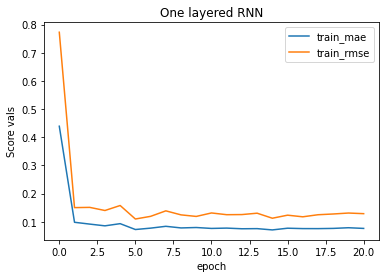


LSTMs RandomSearchCV 최적 파라미터: {'LSTM__epochs': 18, 'LSTM__first_Drop_val': 0.007983414475227634, 'LSTM__first_activator': 'sigmoid', 'LSTM__first_l1': 0.04057703078683424, 'LSTM__first_l2': 0.05407876917587821, 'LSTM__first_neuron': 119, 'LSTM__first_recurrent_Drop_val': 0.4441174022930978, 'LSTM__optimizer_val': 'rmsprop'}
Epoch 1/18
439/439 [==============================] - 10s 11ms/step - loss: 17.1039 - mae: 0.1575 - mse: 0.0536
Epoch 2/18
439/439 [==============================] - 5s 11ms/step - loss: 1.1582 - mae: 0.0660 - mse: 0.0082
Epoch 3/18
439/439 [==============================] - 5s 11ms/step - loss: 1.1569 - mae: 0.0591 - mse: 0.0069
Epoch 4/18
439/439 [==============================] - 5s 11ms/step - loss: 1.1576 - mae: 0.0590 - mse: 0.0076
Epoch 5/18
439/439 [==============================] - 5s 11ms/step - loss: 1.1556 - mae: 0.0533 - mse: 0.0057
Epoch 6/18
439/439 [==============================] - 5s 11ms/step - loss: 1.1569 - mae: 0.0550 - mse: 0.0069
Epoch 7/18


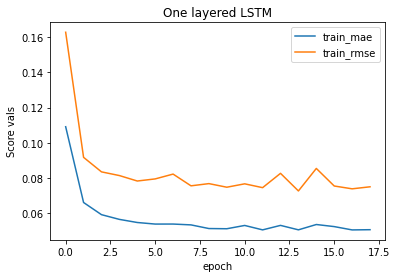

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



GRUs RandomSearchCV 최적 파라미터: {'GRU__epochs': 37, 'GRU__first_Drop_val': 0.05757446939297273, 'GRU__first_activator': 'sigmoid', 'GRU__first_l1': 0.07077725125602669, 'GRU__first_l2': 0.03960129481012701, 'GRU__first_neuron': 82, 'GRU__first_recurrent_Drop_val': 0.5875046777697852, 'GRU__optimizer_val': 'rmsprop'}
Epoch 1/37
439/439 [==============================] - 8s 7ms/step - loss: 18.4655 - mae: 0.1449 - mse: 0.0387
Epoch 2/37
439/439 [==============================] - 3s 7ms/step - loss: 0.7240 - mae: 0.0688 - mse: 0.0099
Epoch 3/37
439/439 [==============================] - 3s 7ms/step - loss: 0.7251 - mae: 0.0674 - mse: 0.0110
Epoch 4/37
439/439 [==============================] - 3s 7ms/step - loss: 0.7252 - mae: 0.0665 - mse: 0.0111
Epoch 5/37
439/439 [==============================] - 3s 7ms/step - loss: 0.7268 - mae: 0.0727 - mse: 0.0127
Epoch 6/37
439/439 [==============================] - 3s 7ms/step - loss: 0.7231 - mae: 0.0608 - mse: 0.0091
Epoch 7/37
439/439 [=========

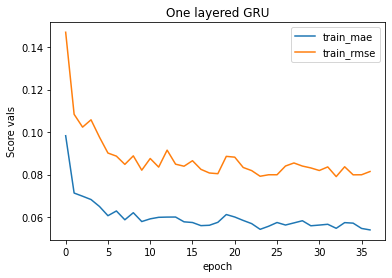

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



LSTM_plus_Denses RandomSearchCV 최적 파라미터: {'LSTM__Dense_first_Drop_val': 0.25051392651083126, 'LSTM__Dense_first_activator': 'tanh', 'LSTM__Dense_first_l1': 0.00011079939392839622, 'LSTM__Dense_first_l2': 0.0017091998784819003, 'LSTM__Dense_first_neuron': 37, 'LSTM__epochs': 29, 'LSTM__first_Drop_val': 0.024312543726553518, 'LSTM__first_activator': 'sigmoid', 'LSTM__first_l1': 0.0022638395287158278, 'LSTM__first_l2': 0.021095411064059846, 'LSTM__first_neuron': 127, 'LSTM__first_recurrent_Drop_val': 0.5811894627511834, 'LSTM__optimizer_val': 'rmsprop'}
Epoch 1/29
439/439 [==============================] - 11s 12ms/step - loss: 1.5268 - mae: 0.1736 - mse: 0.0570
Epoch 2/29
439/439 [==============================] - 5s 12ms/step - loss: 0.0953 - mae: 0.0843 - mse: 0.0138
Epoch 3/29
439/439 [==============================] - 5s 12ms/step - loss: 0.0906 - mae: 0.0833 - mse: 0.0123
Epoch 4/29
439/439 [==============================] - 5s 12ms/step - loss: 0.0868 - mae: 0.0716 - mse: 0.0098
E

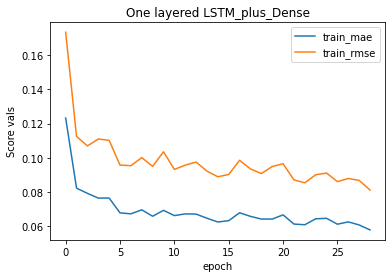


GRU_plus_Denses RandomSearchCV 최적 파라미터: {'GRU__Dense_first_Drop_val': 0.24456314360488368, 'GRU__Dense_first_activator': 'tanh', 'GRU__Dense_first_l1': 0.00015627922365628766, 'GRU__Dense_first_l2': 0.00032248599404668997, 'GRU__Dense_first_neuron': 36, 'GRU__epochs': 26, 'GRU__first_Drop_val': 0.007503882803640949, 'GRU__first_activator': 'sigmoid', 'GRU__first_l1': 0.04056507261019254, 'GRU__first_l2': 0.03893041671574356, 'GRU__first_neuron': 94, 'GRU__first_recurrent_Drop_val': 0.2197734983919463, 'GRU__optimizer_val': 'adam'}
Epoch 1/26
439/439 [==============================] - 8s 7ms/step - loss: 21.4861 - mae: 0.1246 - mse: 0.0307
Epoch 2/26
439/439 [==============================] - 3s 7ms/step - loss: 0.9934 - mae: 0.0813 - mse: 0.0123
Epoch 3/26
439/439 [==============================] - 3s 7ms/step - loss: 0.9727 - mae: 0.0713 - mse: 0.0096
Epoch 4/26
439/439 [==============================] - 3s 7ms/step - loss: 0.9613 - mae: 0.0698 - mse: 0.0089
Epoch 5/26
439/439 [=====

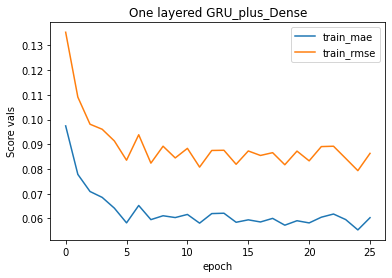

In [ ]:
 
#Adding tuner to LSTM
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras.layers import SimpleRNN
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.model_selection import ParameterSampler
from keras.layers import Reshape
from sklearn.model_selection import TimeSeriesSplit
 
#Accessing to Data
drive.mount('/content/drive')

dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
 

 
target = tr.to_numpy()
 

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.15, shuffle = False)
#, shuffle = False
train_input = train_input.astype('float64')

 
#Cannot mix Data/Test when dealing with LSTM
#So I set shuffle to FALSE
 
 
 

# return_state=True
     
train_input_forlast = train_input.astype('float64')
train_input_forlast_scaler = MaxAbsScaler()
train_input_forlast = train_input_forlast_scaler.fit_transform(train_input_forlast)
train_input_forlast = train_input_forlast.reshape(-1,7,3)
 
train_target_forlast = train_target.astype('float64')
train_target_forlast_scaler = MaxAbsScaler()
train_target_forlast = train_target_forlast_scaler.fit_transform(train_target_forlast)
 
test_input = test_input.astype('float64')
test_input = train_input_forlast_scaler.fit_transform(test_input)
test_input = test_input.reshape(-1,7,3)
 
test_target = test_target.astype('float64')
test_target = train_target_forlast_scaler.fit_transform(test_target)
 
train_target = train_target.astype('float64')
train_target_scaler  = MaxAbsScaler()
train_target = train_target_scaler.fit_transform(train_target)
 
 
NUM_CHECK_INPUT =[[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT = test_input_scaler.transform(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.reshape(7,3)

def Model_Build_With_RNN(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(SimpleRNN(first_neuron, activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))

  #출력층

  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model

def Model_Build_With_LSTM(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))

  #출력층

  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model

def Model_Build_With_GRU(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))

  #출력층

  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model

def Model_Build_With_LSTM_plus_Dense(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, Dense_first_neuron, Dense_first_Drop_val, Dense_first_activator, Dense_first_l1, Dense_first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))

  #출력층

  Model.add(layers.Dense(Dense_first_neuron, kernel_regularizer=regularizers.l1_l2(l1=Dense_first_l1, l2=Dense_first_l2), activation = Dense_first_activator))
  Model.add(keras.layers.Dropout(Dense_first_Drop_val))  

  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model

def Model_Build_With_GRU_plus_Dense(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, Dense_first_neuron, Dense_first_Drop_val, Dense_first_activator, Dense_first_l1, Dense_first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))

  #출력층
 
  Model.add(layers.Dense(Dense_first_neuron, kernel_regularizer=regularizers.l1_l2(l1=Dense_first_l1, l2=Dense_first_l2), activation = Dense_first_activator))
  Model.add(keras.layers.Dropout(Dense_first_Drop_val))  
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model

#RNN
regressor_RNN = KerasRegressor(build_fn = Model_Build_With_RNN, verbose=0)
pipe_RNN = Pipeline([('scaler', MaxAbsScaler()), ('RNN', regressor_RNN)])
 
params = {'RNN__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'RNN__first_Drop_val': uniform(0,0.1),
          'RNN__first_neuron': randint(64,128),
          'RNN__first_activator': ['tanh','sigmoid'],      
          'RNN__optimizer_val' : ['adam','rmsprop'],
          'RNN__first_l1' : uniform(0,0.1),
          'RNN__first_l2' : uniform(0,0.1),     
          'RNN__epochs' : randint(1,40),      
          }
 
grid_RNN = RandomizedSearchCV(pipe_RNN, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_RNN.fit(train_input, train_target)
 
print('\nRNN''s RandomSearchCV 최적 파라미터:', grid_RNN.best_params_)
 

 
 
Model_RNN_For_Test = Model_Build_With_RNN(grid_RNN.best_params_.get('RNN__first_recurrent_Drop_val'), grid_RNN.best_params_.get('RNN__first_Drop_val'), grid_RNN.best_params_.get('RNN__first_neuron'), grid_RNN.best_params_.get('RNN__first__activator'), grid_RNN.best_params_.get('RNN__optimizer_val'), grid_RNN.best_params_.get('RNN__first_l1'), grid_RNN.best_params_.get('RNN__first_l2'))

history_RNN_For_Test = Model_RNN_For_Test.fit(train_input_forlast, train_target_forlast, epochs=grid_RNN.best_params_.get('RNN__epochs'), batch_size=1, verbose=0)

Model_RNN_For_Test_mse_score, Model_RNN_For_Test_mae_score, Model_RNN_For_Test_mse_score = Model_RNN_For_Test.evaluate(test_input, test_target)
 
Best_score_RNN = np.array([[math.sqrt(-1*grid_RNN.best_score_)]])
Test_mae = np.array([[Model_RNN_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_RNN_For_Test_mse_score)]])
#LSTM_Prediction = np.array(Model_LSTM_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for RNN is: ', train_target_scaler.inverse_transform(Best_score_RNN))
#print('\nPrediction for LSTM is: ', test_target_scaler.inverse_transform(LSTM_Prediction))
print('\nRNN''s Mae score for Test is: ', train_target_forlast_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nRNN''s Rmse score for Test is: ',train_target_forlast_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered RNN")
plt.plot(history_RNN_For_Test.history['mae'])
plt.plot(np.sqrt(history_RNN_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

#LSTM
regressor_LSTM = KerasRegressor(build_fn = Model_Build_With_LSTM, verbose=0)
pipe_LSTM = Pipeline([('scaler', MaxAbsScaler()), ('LSTM', regressor_LSTM)])
 
params = {'LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM__first_Drop_val': uniform(0,0.1),
          'LSTM__first_neuron': randint(64,128),
          'LSTM__first_activator': ['tanh','sigmoid'],      
          'LSTM__optimizer_val' : ['adam','rmsprop'],
          'LSTM__first_l1' : uniform(0,0.1),
          'LSTM__first_l2' : uniform(0,0.1),     
          'LSTM__epochs' : randint(1,40),      
          }
 
grid_LSTM = RandomizedSearchCV(pipe_LSTM, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_LSTM.fit(train_input, train_target)
 
print('\nLSTM''s RandomSearchCV 최적 파라미터:', grid_LSTM.best_params_)
 
"""
Model_LSTM = Model_Build_With_LSTM(0.3, 0.01, 64, 'tanh', 'rmsprop', 0.1, 0.1)
history_LSTM = Model_LSTM.fit(train_input, train_target, epochs=8, batch_size=1, validation_data = (validation_input, validation_target), verbose=0)#, batch_size=1
#, epochs=grid_LSTM.best_params_.get('LSTM__epochs')
#, validation_data = (validation_input, validation_target)\
"""
 
 
Model_LSTM_For_Test = Model_Build_With_LSTM(grid_LSTM.best_params_.get('LSTM__first_recurrent_Drop_val'), grid_LSTM.best_params_.get('LSTM__first_Drop_val'), grid_LSTM.best_params_.get('LSTM__first_neuron'), grid_LSTM.best_params_.get('LSTM__first__activator'), grid_LSTM.best_params_.get('LSTM__optimizer_val'), grid_LSTM.best_params_.get('LSTM__first_l1'), grid_LSTM.best_params_.get('LSTM__first_l2'))

history_LSTM_For_Test = Model_LSTM_For_Test.fit(train_input_forlast, train_target_forlast, epochs=grid_LSTM.best_params_.get('LSTM__epochs'), batch_size=1, verbose=0)

Model_LSTM_For_Test_mse_score, Model_LSTM_For_Test_mae_score, Model_LSTM_For_Test_mse_score = Model_LSTM_For_Test.evaluate(test_input, test_target)
 
Best_score_LSTM = np.array([[math.sqrt(-1*grid_LSTM.best_score_)]])
Test_mae = np.array([[Model_LSTM_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_LSTM_For_Test_mse_score)]])
#LSTM_Prediction = np.array(Model_LSTM_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for LSTM is: ', train_target_scaler.inverse_transform(Best_score_LSTM))
#print('\nPrediction for LSTM is: ', test_target_scaler.inverse_transform(LSTM_Prediction))
print('\nLSTM''s Mae score for Test is: ', train_target_forlast_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nLSTM''s Rmse score for Test is: ',train_target_forlast_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered LSTM")
plt.plot(history_LSTM_For_Test.history['mae'])
plt.plot(np.sqrt(history_LSTM_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

#GRU
regressor_GRU = KerasRegressor(build_fn = Model_Build_With_GRU, verbose=0)
pipe_GRU = Pipeline([('scaler', MaxAbsScaler()), ('GRU', regressor_GRU)])
 
params = {'GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU__first_Drop_val': uniform(0,0.1),
          'GRU__first_neuron': randint(64,128),
          'GRU__first_activator': ['tanh','sigmoid'],      
          'GRU__optimizer_val' : ['adam','rmsprop'],
          'GRU__first_l1' : uniform(0,0.1),
          'GRU__first_l2' : uniform(0,0.1),     
          'GRU__epochs' : randint(1,40),      
          }
 
grid_GRU = RandomizedSearchCV(pipe_GRU, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_GRU.fit(train_input, train_target)
 
print('\nGRU''s RandomSearchCV 최적 파라미터:', grid_GRU.best_params_)
 

 
 
Model_GRU_For_Test = Model_Build_With_GRU(grid_GRU.best_params_.get('GRU__first_recurrent_Drop_val'), grid_GRU.best_params_.get('GRU__first_Drop_val'), 
                                            grid_GRU.best_params_.get('GRU__first_neuron'), grid_GRU.best_params_.get('GRU__first__activator'), 
                                            grid_GRU.best_params_.get('GRU__optimizer_val'), grid_GRU.best_params_.get('GRU__first_l1'), grid_GRU.best_params_.get('GRU__first_l2'))

history_GRU_For_Test = Model_GRU_For_Test.fit(train_input_forlast, train_target_forlast, epochs=grid_GRU.best_params_.get('GRU__epochs'), batch_size=1, verbose=0)

Model_GRU_For_Test_mse_score, Model_GRU_For_Test_mae_score, Model_GRU_For_Test_mse_score = Model_GRU_For_Test.evaluate(test_input, test_target)
 
Best_score_GRU = np.array([[math.sqrt(-1*grid_GRU.best_score_)]])
Test_mae = np.array([[Model_GRU_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_GRU_For_Test_mse_score)]])
#GRU_Prediction = np.array(Model_GRU_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for GRU is: ', train_target_scaler.inverse_transform(Best_score_GRU))
#print('\nPrediction for GRU is: ', test_target_scaler.inverse_transform(GRU_Prediction))
print('\nGRU''s Mae score for Test is: ', train_target_forlast_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nGRU''s Rmse score for Test is: ',train_target_forlast_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered GRU")
plt.plot(history_GRU_For_Test.history['mae'])
plt.plot(np.sqrt(history_GRU_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()


#LSTM with one hidden layer
regressor_LSTM_plus_Dense = KerasRegressor(build_fn = Model_Build_With_LSTM_plus_Dense, verbose=0)
pipe_LSTM_plus_Dense = Pipeline([('scaler', MaxAbsScaler()), ('LSTM', regressor_LSTM_plus_Dense)])
 
params = {'LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM__first_Drop_val': uniform(0,0.1),
          'LSTM__first_neuron': randint(64,128),
          'LSTM__first_activator': ['tanh','sigmoid'],      
          'LSTM__optimizer_val' : ['adam','rmsprop'],
          'LSTM__first_l1' : uniform(0,0.1),
          'LSTM__first_l2' : uniform(0,0.1),     
          'LSTM__epochs' : randint(1,40),
          'LSTM__Dense_first_neuron' : randint(10,64),
          'LSTM__Dense_first_Drop_val': uniform(0,0.3),
          'LSTM__Dense_first_activator': ['tanh','sigmoid'],
          'LSTM__Dense_first_l1' : uniform(0,0.003),
          'LSTM__Dense_first_l2' : uniform(0,0.003), 
          }
 
grid_LSTM_plus_Dense = RandomizedSearchCV(pipe_LSTM_plus_Dense, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_LSTM_plus_Dense.fit(train_input, train_target)
 
print('\nLSTM_plus_Dense''s RandomSearchCV 최적 파라미터:', grid_LSTM_plus_Dense.best_params_)
 
"""
Model_LSTM = Model_Build_With_LSTM(0.3, 0.01, 64, 'tanh', 'rmsprop', 0.1, 0.1)
history_LSTM = Model_LSTM.fit(train_input, train_target, epochs=8, batch_size=1, validation_data = (validation_input, validation_target), verbose=0)#, batch_size=1
#, epochs=grid_LSTM.best_params_.get('LSTM__epochs')
#, validation_data = (validation_input, validation_target)\
"""
 
 
Model_LSTM_plus_Dense_For_Test = Model_Build_With_LSTM_plus_Dense(grid_LSTM_plus_Dense.best_params_.get('LSTM__first_recurrent_Drop_val'), grid_LSTM_plus_Dense.best_params_.get('LSTM__first_Drop_val'), grid_LSTM_plus_Dense.best_params_.get('LSTM__first_neuron'), 
                                            grid_LSTM.best_params_.get('LSTM__first__activator'), grid_LSTM_plus_Dense.best_params_.get('LSTM__optimizer_val'), grid_LSTM_plus_Dense.best_params_.get('LSTM__first_l1'), grid_LSTM_plus_Dense.best_params_.get('LSTM__first_l2'),
                                            grid_LSTM_plus_Dense.best_params_.get('LSTM__Dense_first_neuron'), grid_LSTM_plus_Dense.best_params_.get('LSTM__Dense_first_Drop_val'), grid_LSTM_plus_Dense.best_params_.get('LSTM__Dense_first_activator'), 
                                            grid_LSTM_plus_Dense.best_params_.get('LSTM__Dense_first_l1'), grid_LSTM_plus_Dense.best_params_.get('LSTM__Dense_first_l2'))

history_LSTM_plus_Dense_For_Test = Model_LSTM_plus_Dense_For_Test.fit(train_input_forlast, train_target_forlast, epochs=grid_LSTM_plus_Dense.best_params_.get('LSTM__epochs'), batch_size=1, verbose=0)

Model_LSTM_plus_Dense_For_Test_mse_score, Model_LSTM_plus_Dense_For_Test_mae_score, Model_LSTM_plus_Dense_For_Test_mse_score = Model_LSTM_plus_Dense_For_Test.evaluate(test_input, test_target)
 
Best_score_LSTM_plus_Dense = np.array([[math.sqrt(-1*grid_LSTM_plus_Dense.best_score_)]])
Test_mae = np.array([[Model_LSTM_plus_Dense_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_LSTM_plus_Dense_For_Test_mse_score)]])
#LSTM_Prediction = np.array(Model_LSTM_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for LSTM_plus_Dense is: ', train_target_scaler.inverse_transform(Best_score_LSTM_plus_Dense))
#print('\nPrediction for LSTM is: ', test_target_scaler.inverse_transform(LSTM_Prediction))
print('\nLSTM_plus_Dense''s Mae score for Test is: ', test_target_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nLSTM_plus_Dense''s Rmse score for Test is: ',test_target_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered LSTM_plus_Dense")
plt.plot(history_LSTM_plus_Dense_For_Test.history['mae'])
plt.plot(np.sqrt(history_LSTM_plus_Dense_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

#GRU with one hidden layer
regressor_GRU_plus_Dense = KerasRegressor(build_fn = Model_Build_With_GRU_plus_Dense, verbose=0)
pipe_GRU_plus_Dense = Pipeline([('scaler', MaxAbsScaler()), ('GRU', regressor_GRU_plus_Dense)])
 
params = {'GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU__first_Drop_val': uniform(0,0.1),
          'GRU__first_neuron': randint(64,128),
          'GRU__first_activator': ['tanh','sigmoid'],      
          'GRU__optimizer_val' : ['adam','rmsprop'],
          'GRU__first_l1' : uniform(0,0.1),
          'GRU__first_l2' : uniform(0,0.1),     
          'GRU__epochs' : randint(1,40),
          'GRU__Dense_first_neuron' : randint(10,64),
          'GRU__Dense_first_Drop_val': uniform(0,0.3),
          'GRU__Dense_first_activator': ['tanh','sigmoid'],
          'GRU__Dense_first_l1' : uniform(0,0.003),
          'GRU__Dense_first_l2' : uniform(0,0.003),       
          }
 
grid_GRU_plus_Dense = RandomizedSearchCV(pipe_GRU_plus_Dense, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_GRU_plus_Dense.fit(train_input, train_target)
 
print('\nGRU_plus_Dense''s RandomSearchCV 최적 파라미터:', grid_GRU_plus_Dense.best_params_)
 

 
 
Model_GRU_plus_Dense_For_Test = Model_Build_With_GRU_plus_Dense(grid_GRU_plus_Dense.best_params_.get('GRU__first_recurrent_Drop_val'), grid_GRU_plus_Dense.best_params_.get('GRU__first_Drop_val'), 
                                            grid_GRU_plus_Dense.best_params_.get('GRU__first_neuron'), grid_GRU_plus_Dense.best_params_.get('GRU__first__activator'), 
                                            grid_GRU.best_params_.get('GRU__optimizer_val'), grid_GRU.best_params_.get('GRU__first_l1'), grid_GRU_plus_Dense.best_params_.get('GRU__first_l2'),
                                            grid_GRU_plus_Dense.best_params_.get('GRU__Dense_first_neuron'), grid_GRU_plus_Dense.best_params_.get('GRU__Dense_first_Drop_val'), grid_GRU_plus_Dense.best_params_.get('GRU__Dense_first_activator'), 
                                            grid_GRU_plus_Dense.best_params_.get('GRU__Dense_first_l1'), grid_GRU_plus_Dense.best_params_.get('GRU__Dense_first_l2'))

history_GRU_plus_Dense_For_Test = Model_GRU_plus_Dense_For_Test.fit(train_input_forlast, train_target_forlast, epochs=grid_GRU_plus_Dense.best_params_.get('GRU__epochs'), batch_size=1, verbose=0)

Model_GRU_plus_Dense_For_Test_mse_score, Model_GRU_plus_Dense_For_Test_mae_score, Model_GRU_plus_Dense_For_Test_mse_score = Model_GRU_plus_Dense_For_Test.evaluate(test_input, test_target)
 
Best_score_GRU_plus_Dense = np.array([[math.sqrt(-1*grid_GRU_plus_Dense.best_score_)]])
Test_mae = np.array([[Model_GRU_plus_Dense_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_GRU_plus_Dense_For_Test_mse_score)]])
#GRU_Prediction = np.array(Model_GRU_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for GRU_plus_Dense is: ', train_target_scaler.inverse_transform(Best_score_GRU_plus_Dense))
#print('\nPrediction for GRU is: ', test_target_scaler.inverse_transform(GRU_Prediction))
print('\nGRU_plus_Dense''s Mae score for Test is: ', test_target_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nGRU_plus_Dense''s Rmse score for Test is: ',test_target_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered GRU_plus_Dense")
plt.plot(history_GRU_plus_Dense_For_Test.history['mae'])
plt.plot(np.sqrt(history_GRU_plus_Dense_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

CNN_LSTMs RandomSearchCV 최적 파라미터: {'CNN_LSTM__CNN_MaxPoolval': 2, 'CNN_LSTM__CNN_Window_size': 2, 'CNN_LSTM__CNN_activation': 'tanh', 'CNN_LSTM__CNN_neuron': 97, 'CNN_LSTM__epochs': 4, 'CNN_LSTM__first_Drop_val': 0.0004297154831388484, 'CNN_LSTM__first_activator': 'sigmoid', 'CNN_LSTM__first_l1': 0.07705719766127933, 'CNN_LSTM__first_l2': 0.03240257956620435, 'CNN_LSTM__first_neuron': 92, 'CNN_LSTM__first_recurrent_Drop_val': 0.1222033809457119, 'CNN_LSTM__optimizer_val': 'rmsprop'}
Epoch 1/4
439/439 [==============================] - 6s 4ms/step - loss: 23.2678 - mae: 0.0974 - mse: 0.0220
Epoch 2/4
439/439 [==============================] - 2s 4ms/step - loss: 1.3148 - mae: 0.0703 - mse: 0.0099
Epoch 3/4
439/439 [==============================] - 2s 4ms/step - loss: 1.3134 - mae: 0.0669 - mse: 0.0087
Epoch 4/4
3/3 [==============================] - 2s 5ms/s

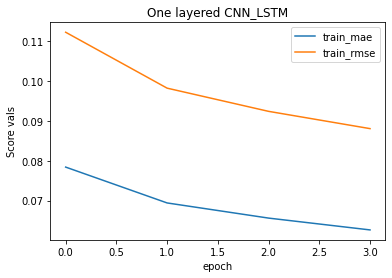

In [2]:
#Adding tuner to LSTM
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras.layers import SimpleRNN
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.model_selection import ParameterSampler
from keras.layers import Reshape
from sklearn.model_selection import TimeSeriesSplit
 
#Accessing to Data
drive.mount('/content/drive')

dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
 

 
target = tr.to_numpy()
 

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.15, shuffle = False)
#, shuffle = False
train_input = train_input.astype('float64')

 
#Cannot mix Data/Test when dealing with LSTM
#So I set shuffle to FALSE
 
 
 

# return_state=True
     
train_input_forlast = train_input.astype('float64')
train_input_forlast_scaler = MaxAbsScaler()
train_input_forlast = train_input_forlast_scaler.fit_transform(train_input_forlast)
train_input_forlast = train_input_forlast.reshape(-1,7,3)
 
train_target_forlast = train_target.astype('float64')
train_target_forlast_scaler = MaxAbsScaler()
train_target_forlast = train_target_forlast_scaler.fit_transform(train_target_forlast)
 
test_input = test_input.astype('float64')
test_input = train_input_forlast_scaler.fit_transform(test_input)
test_input = test_input.reshape(-1,7,3)
 
test_target = test_target.astype('float64')
test_target = train_target_forlast_scaler.fit_transform(test_target)
 
train_target = train_target.astype('float64')
train_target_scaler  = MaxAbsScaler()
train_target = train_target_scaler.fit_transform(train_target)
 
"""
NUM_CHECK_INPUT =[[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT = test_input_scaler.transform(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.reshape(7,3)
"""

def Model_Build_With_CNN_LSTM(CNN_neuron, CNN_Window_size, CNN_activation, CNN_MaxPoolval, first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  
  Model.add(layers.Reshape((7,3))) 
  Model.add(layers.Conv1D(CNN_neuron, CNN_Window_size, activation=CNN_activation, padding = 'same'))
  Model.add(layers.MaxPooling1D(CNN_MaxPoolval))

  #recurrent_activation = first_activator
  #출력층
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))#input_shape=(7,3,),
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model


regressor_CNN_LSTM = KerasRegressor(build_fn = Model_Build_With_CNN_LSTM, verbose=0)
pipe_CNN_LSTM = Pipeline([('scaler', MaxAbsScaler()), ('CNN_LSTM', regressor_CNN_LSTM)])
 
params = {'CNN_LSTM__CNN_neuron' : randint(32,128),
          'CNN_LSTM__CNN_Window_size' : randint(2,5),
          'CNN_LSTM__CNN_activation' : ['tanh','sigmoid'], 
          'CNN_LSTM__CNN_MaxPoolval' : randint(1,3),
          'CNN_LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'CNN_LSTM__first_Drop_val': uniform(0,0.1),
          'CNN_LSTM__first_neuron': randint(64,128),
          'CNN_LSTM__first_activator': ['tanh','sigmoid'],      
          'CNN_LSTM__optimizer_val' : ['adam','rmsprop'],
          'CNN_LSTM__first_l1' : uniform(0,0.1),
          'CNN_LSTM__first_l2' : uniform(0,0.1),     
          'CNN_LSTM__epochs' : randint(1,40),      
          }
 
grid_CNN_LSTM = RandomizedSearchCV(pipe_CNN_LSTM, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',n_iter=50, cv = TimeSeriesSplit(n_splits = 4), verbose=0, n_jobs = -1)
grid_CNN_LSTM.fit(train_input, train_target)
 
print('\nCNN_LSTM''s RandomSearchCV 최적 파라미터:', grid_CNN_LSTM.best_params_)
 
 
Model_CNN_LSTM_For_Test = Model_Build_With_CNN_LSTM(grid_CNN_LSTM.best_params_.get('CNN_LSTM__CNN_neuron'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__CNN_Window_size'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__CNN_activation'), 
                                                    grid_CNN_LSTM.best_params_.get('CNN_LSTM__CNN_MaxPoolval'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_recurrent_Drop_val'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_Drop_val'), 
                                                    grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_neuron'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_activator'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__optimizer_val'), 
                                                    grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_l1'), grid_CNN_LSTM.best_params_.get('CNN_LSTM__first_l2'))


history_CNN_LSTM_For_Test = Model_CNN_LSTM_For_Test.fit(train_input_forlast, train_target_forlast, epochs = grid_CNN_LSTM.best_params_.get('CNN_LSTM__epochs'),batch_size=1, verbose=1)#
#
Model_CNN_LSTM_For_Test_mse_score, Model_CNN_LSTM_For_Test_mae_score, Model_CNN_LSTM_For_Test_mse_score = Model_CNN_LSTM_For_Test.evaluate(test_input, test_target)
 
Best_score_CNN_LSTM = np.array([[math.sqrt(-1*grid_CNN_LSTM.best_score_)]])
Test_mae = np.array([[Model_CNN_LSTM_For_Test_mae_score]])
Test_Rmse = np.array([[math.sqrt(Model_CNN_LSTM_For_Test_mse_score)]])
#LSTM_Prediction = np.array(Model_LSTM_For_Test.predict(NUM_CHECK_INPUT))
 
print('\nBest score for CNN_LSTM is: ', train_target_scaler.inverse_transform(Best_score_CNN_LSTM))
#print('\nPrediction for CNN_LSTM is: ', test_target_scaler.inverse_transform(LSTM_Prediction))
print('\nCNN_LSTM''s Mae score for Test is: ', train_target_forlast_scaler.inverse_transform(Test_mae))#test_target_mean
print('\nCNN_LSTM''s Rmse score for Test is: ',train_target_forlast_scaler.inverse_transform(Test_Rmse))
 

plt.title("One layered CNN_LSTM")
plt.plot(history_CNN_LSTM_For_Test.history['mae'])
plt.plot(np.sqrt(history_CNN_LSTM_For_Test.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
